In [1]:
import math

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D

In [2]:
df = pd.read_csv("data/results/overall_results.csv")
df.rename(
    columns={df.columns[0]: "model", "L0_accuracy": "no plagiarism"}, inplace=True
)
df['model_name'] = df['model']
df["model"] = df["model"].apply(
    lambda x: (
        "_".join(x.split("_")[:2]).replace("azure-", "").replace("ollama-", "")
        if "jplag" not in x
        else x.replace(".csv", "")
    )
)

models_to_eval = [
    "codellama:13b",
    "mistral:7b",
    "GPT-4o",
    "codegemma:7b",
    "GPT-3.5 Turbo",
    "deepseek-coder:1.3b",
    "phi3:3b",
    "llama3:8b",
    "gemma2:9b",
    "codestral:22b",
    "JPlag 70% threshold",
]

jplag_models = [
    "JPlag 90% threshold",
    "JPlag 75% threshold",
    "JPlag 70% threshold",
    "JPlag 50% threshold",
    "JPlag 30% threshold",
]

best_models_to_eval = [
    "codellama:13b",
    "GPT-4o",
    "GPT-3.5 Turbo",
    "llama3:8b",
    "JPlag 70% threshold",
]

model2text = {
    "jplag_results_0.9": "JPlag 90% threshold",
    "jplag_results_0.75": "JPlag 75% threshold",
    "jplag_results_0.7": "JPlag 70% threshold",
    "jplag_results_0.5": "JPlag 50% threshold",
    "jplag_results_0.3": "JPlag 30% threshold",
    "codellama:13b_BootstrapFewShotWithRandomSearch": "codellama:13b",
    "mistral_BootstrapFewShotWithRandomSearch": "mistral:7b",
    "gpt-4o_BootstrapFewShotWithRandomSearch": "GPT-4o",
    "gpt-35-turbo_BootstrapFewShotWithRandomSearch": "GPT-3.5 Turbo",
    "deepseek-coder_BootstrapFewShotWithRandomSearch": "deepseek-coder:1.3b",
    "codegemma_BootstrapFewShotWithRandomSearch": "codegemma:7b",
    "deepseek-coder_BootstrapFewShotWithRandomSearch ": "deepseek-coder:1.3b",
    "phi3_BootstrapFewShotWithRandomSearch": "phi3:3b",
    "llama3_BootstrapFewShotWithRandomSearch": "llama3:8b",
    "gemma2_BootstrapFewShotWithRandomSearch": "gemma2:9b",
    "codestral_BootstrapFewShotWithRandomSearch": "codestral:22b",
}

df = df.replace({"model": model2text})

jplag_df = df[df["model"].isin(jplag_models)].copy()
best_df = df[df["model"].isin(best_models_to_eval)].copy()
all_df = df[df["model"].isin(models_to_eval)].copy()


/var/folders/7z/7kg87r0908z_4ydpf7tq1pvw0000gn/T/ipykernel_4047/1291657591.py:34: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.barplot(


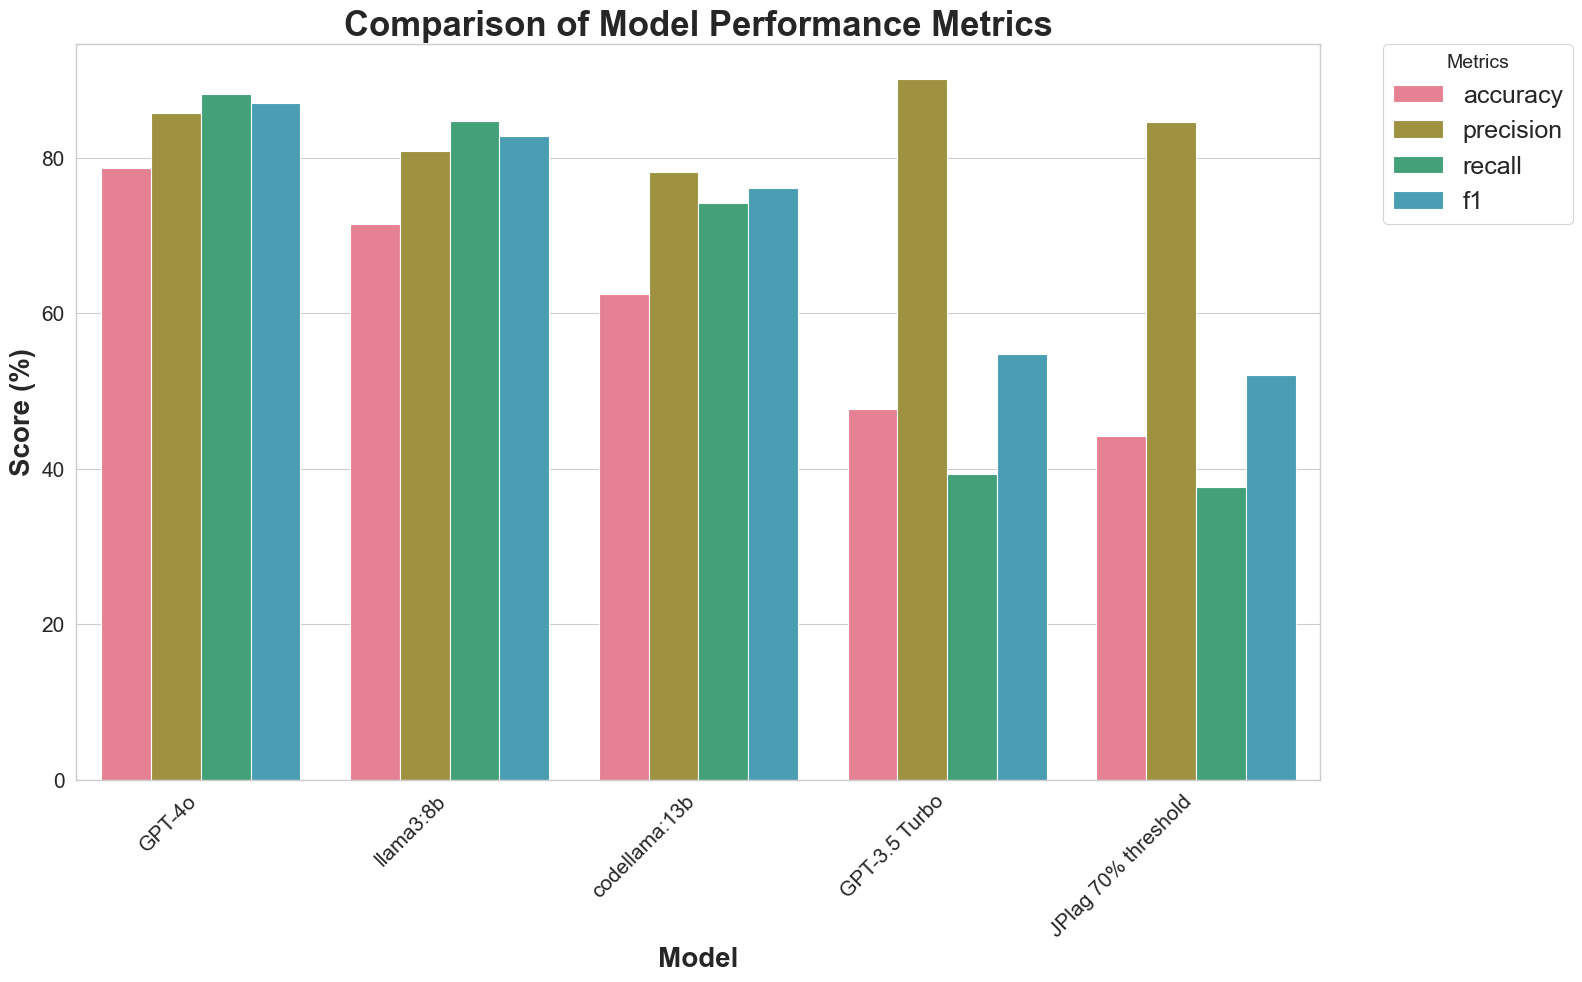

/var/folders/7z/7kg87r0908z_4ydpf7tq1pvw0000gn/T/ipykernel_4047/1291657591.py:34: UserWarning: The palette list has more values (11) than needed (4), which may not be intended.
  ax = sns.barplot(


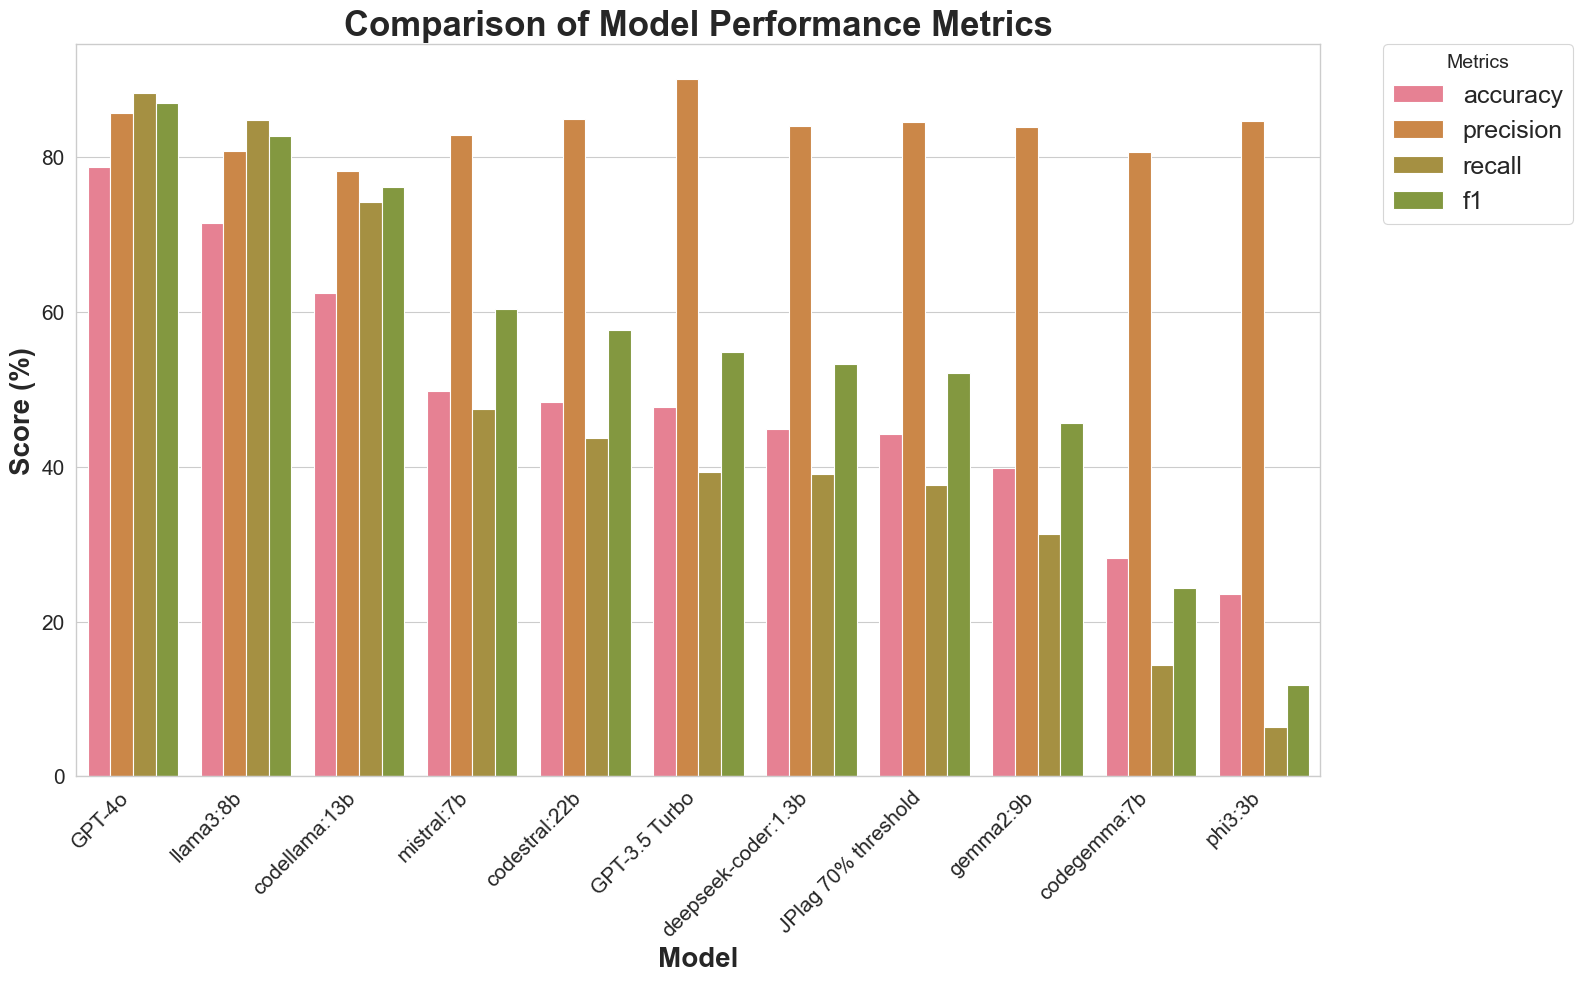

/var/folders/7z/7kg87r0908z_4ydpf7tq1pvw0000gn/T/ipykernel_4047/1291657591.py:34: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.barplot(


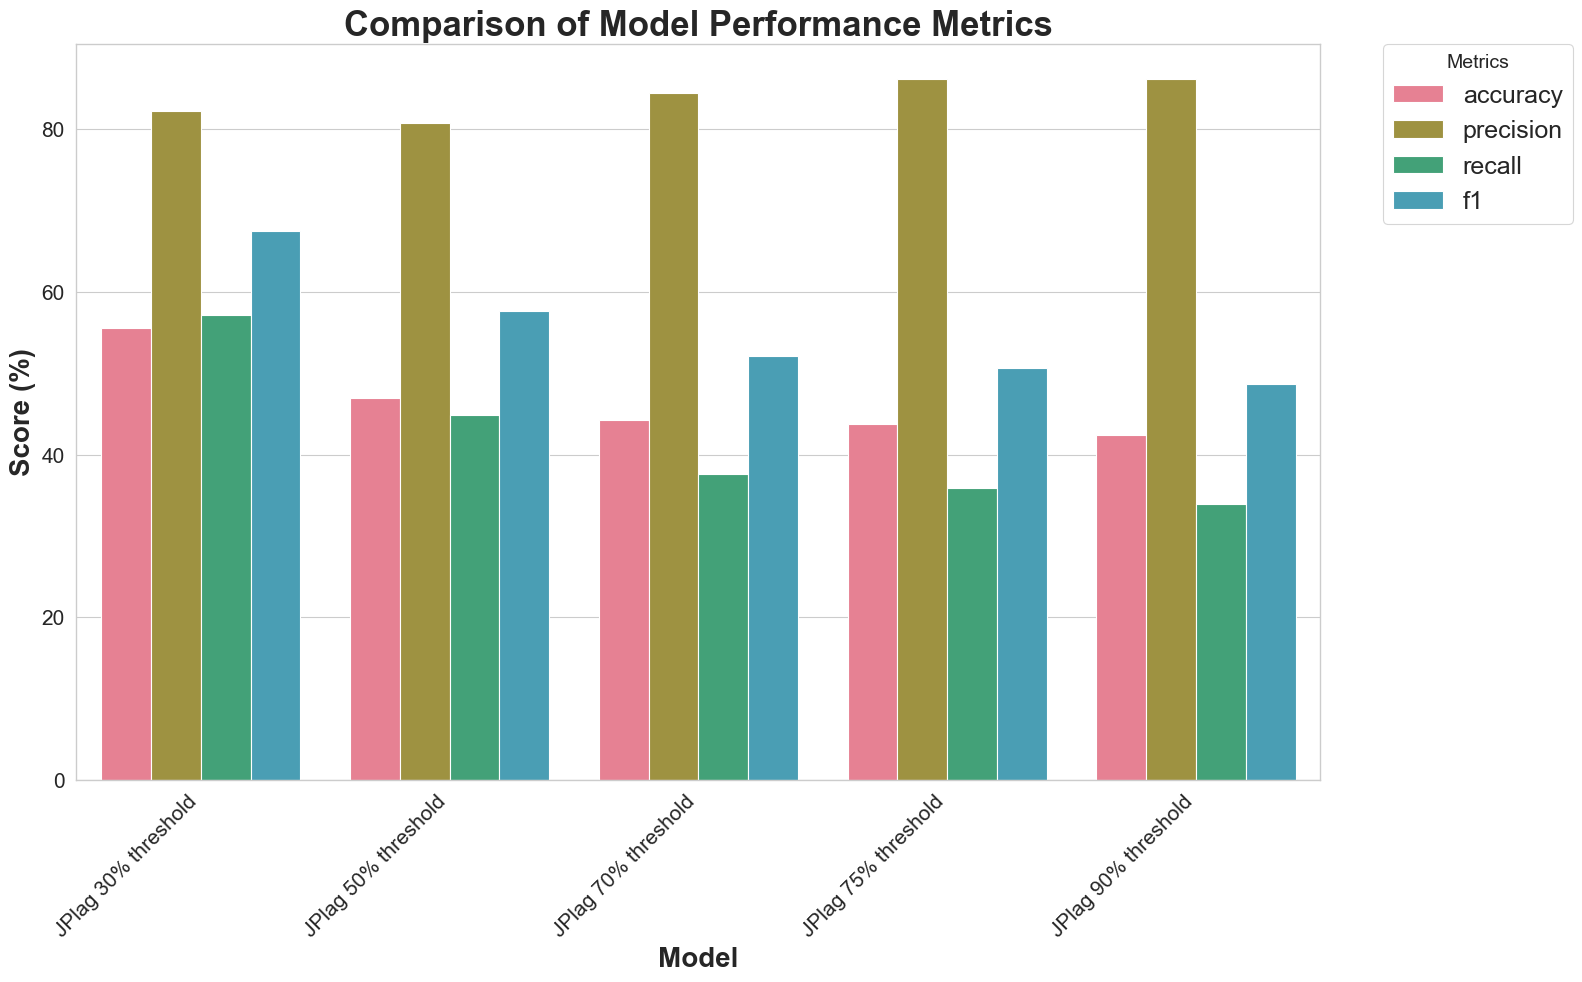

In [3]:
def plot_llm_performance(df: pd.DataFrame, name: str) -> None:
    data = df.copy()

    for c in ["accuracy", "precision", "recall", "f1"] + [
        "no plagiarism",
        "L1_accuracy",
        "L2_accuracy",
        "L3_accuracy",
        "L4_accuracy",
        "L5_accuracy",
        "L6_accuracy",
    ]:
        data[c] = round(data[c] * 100, 2)

    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.3)

    # Use a color-blind friendly palette
    colors = sns.color_palette("husl", n_colors=len(data))

    # Select main metrics
    metrics = ["accuracy", "precision", "recall", "f1"]

    # Melt the dataframe for easier plotting
    melted_data = pd.melt(data, id_vars=["model"], value_vars=metrics)

    # Create a custom order for the models based on overall performance
    model_order = data.sort_values("accuracy", ascending=False)["model"]

    # Set up the plot
    plt.figure(figsize=(16, 10))

    # Create the grouped bar plot
    ax = sns.barplot(
        x="model",
        y="value",
        hue="variable",
        data=melted_data,
        palette=colors,
        order=model_order,
    )

    # Customize the plot
    plt.title("Comparison of Model Performance Metrics", fontsize=25, fontweight="bold")
    plt.xlabel("Model", fontsize=20, fontweight="bold")
    plt.ylabel("Score (%)", fontsize=20, fontweight="bold")
    plt.xticks(rotation=45, ha="right", fontsize=15)
    plt.yticks(fontsize=15)

    # Improve legend
    plt.legend(
        title="Metrics",
        title_fontsize="14",
        fontsize="18",
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        borderaxespad=0.0,
    )

    # # Add value labels on the bars
    # for container in ax.containers:
    #     ax.bar_label(container, fmt="%.2f", fontsize=14, padding=2)

    # Adjust layout and display the plot
    plt.tight_layout()
    # save plot
    plt.savefig(f"plots/{name}.png")
    plt.show()



plot_llm_performance(best_df, "selected_llms_performance_metrics")
plot_llm_performance(all_df, "llms_performance_metrics")
plot_llm_performance(jplag_df, "jplag_performance_metrics")

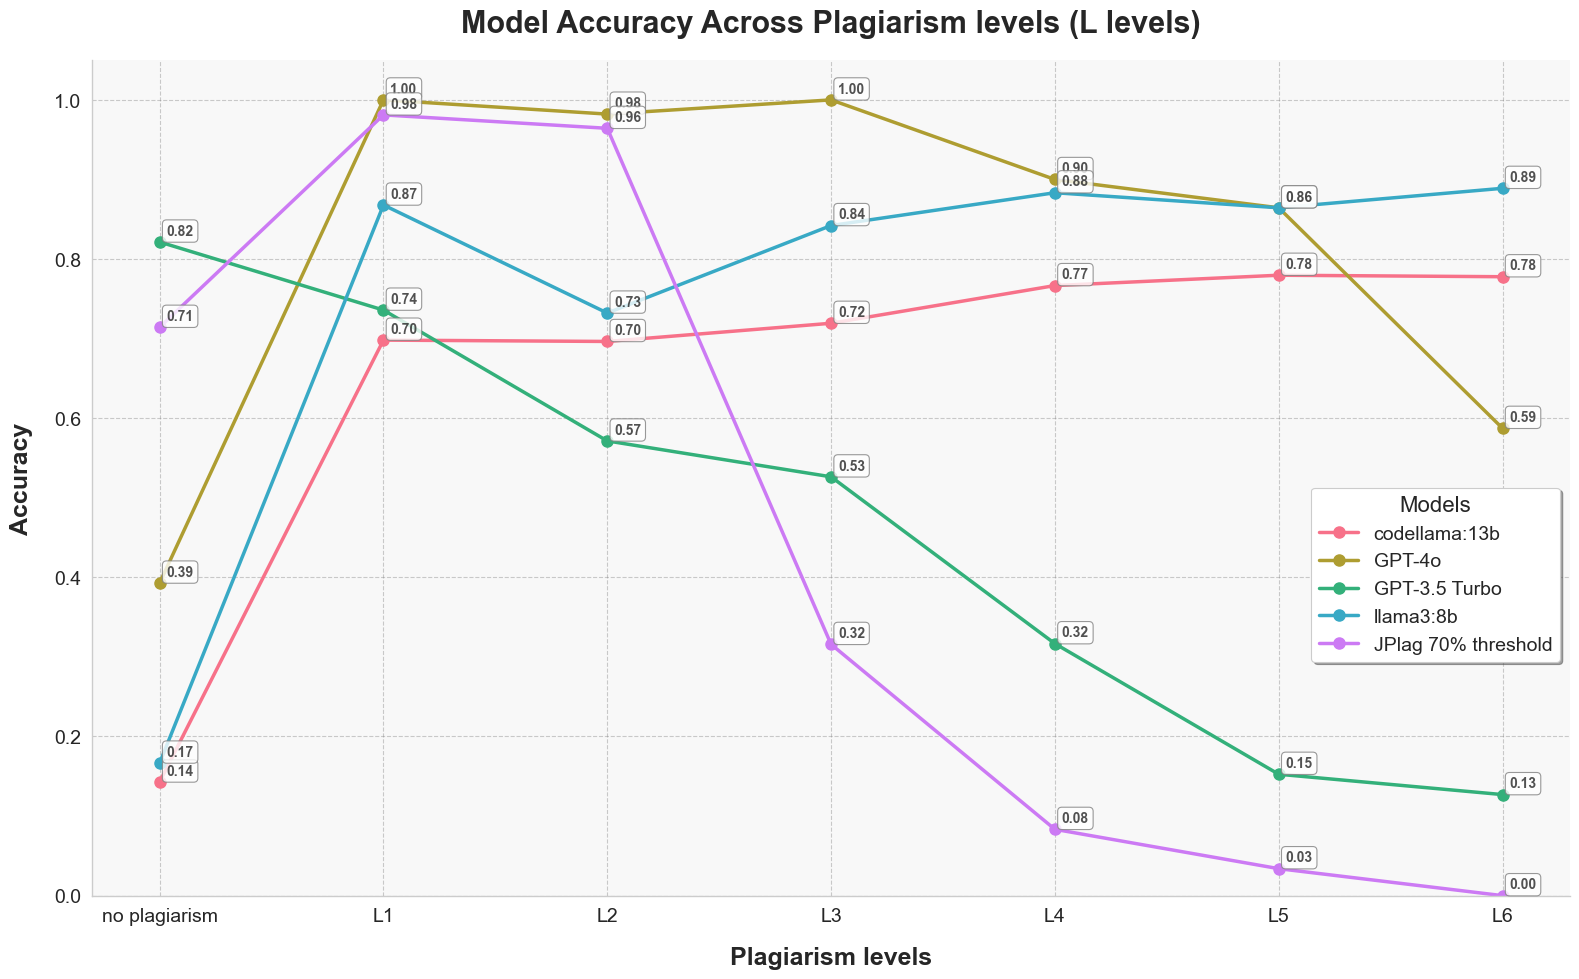

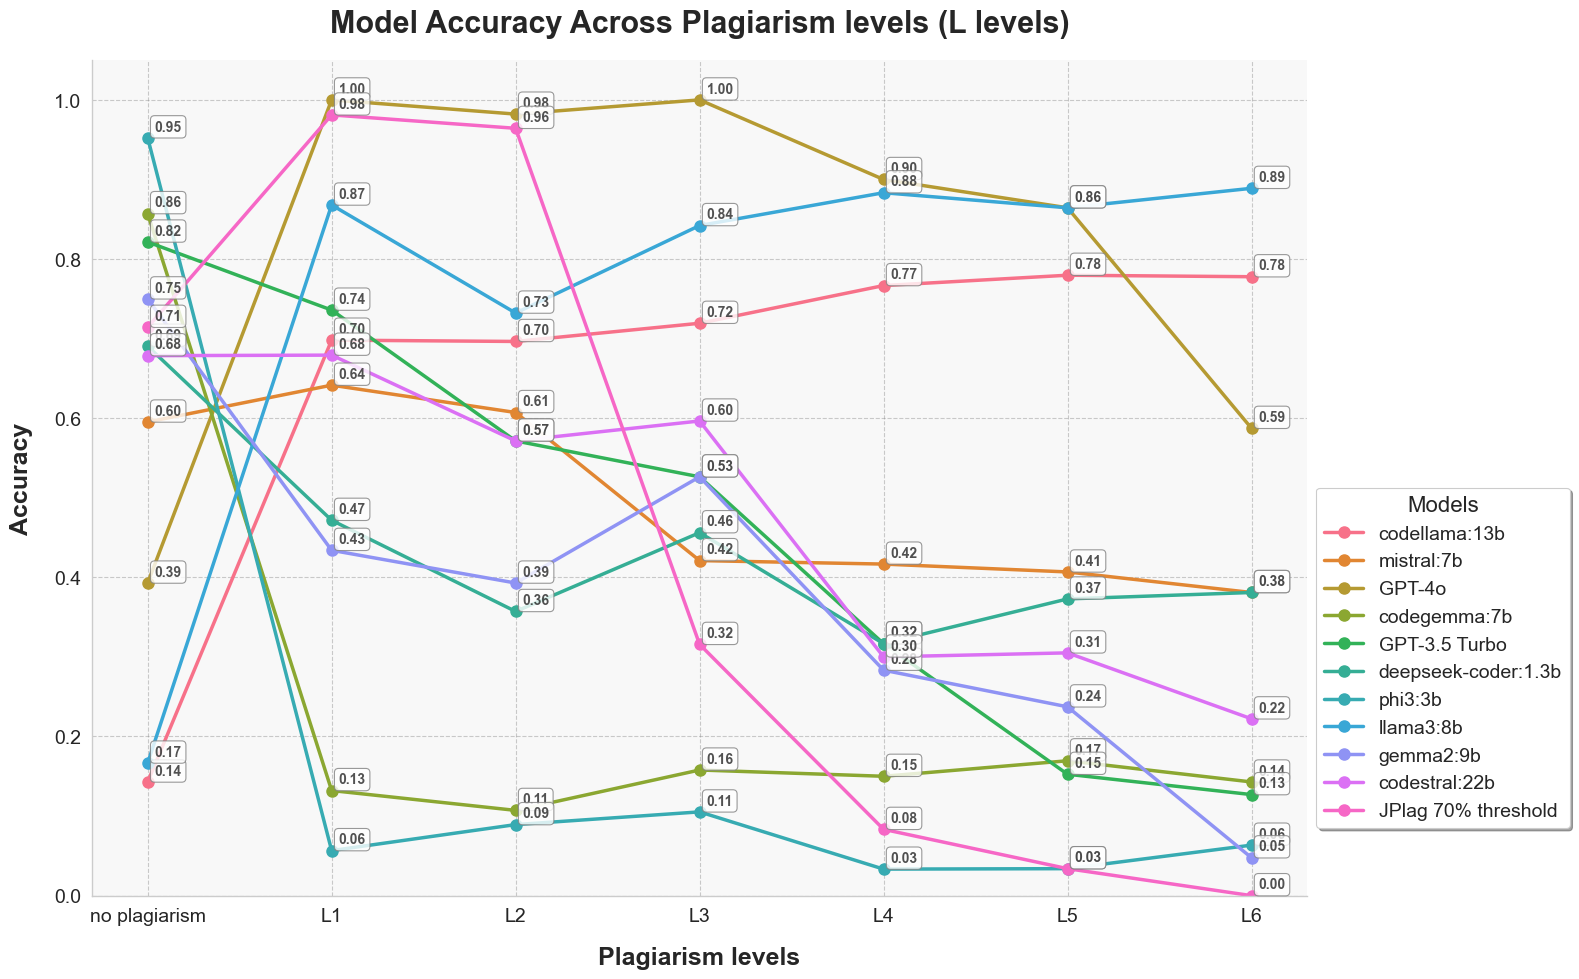

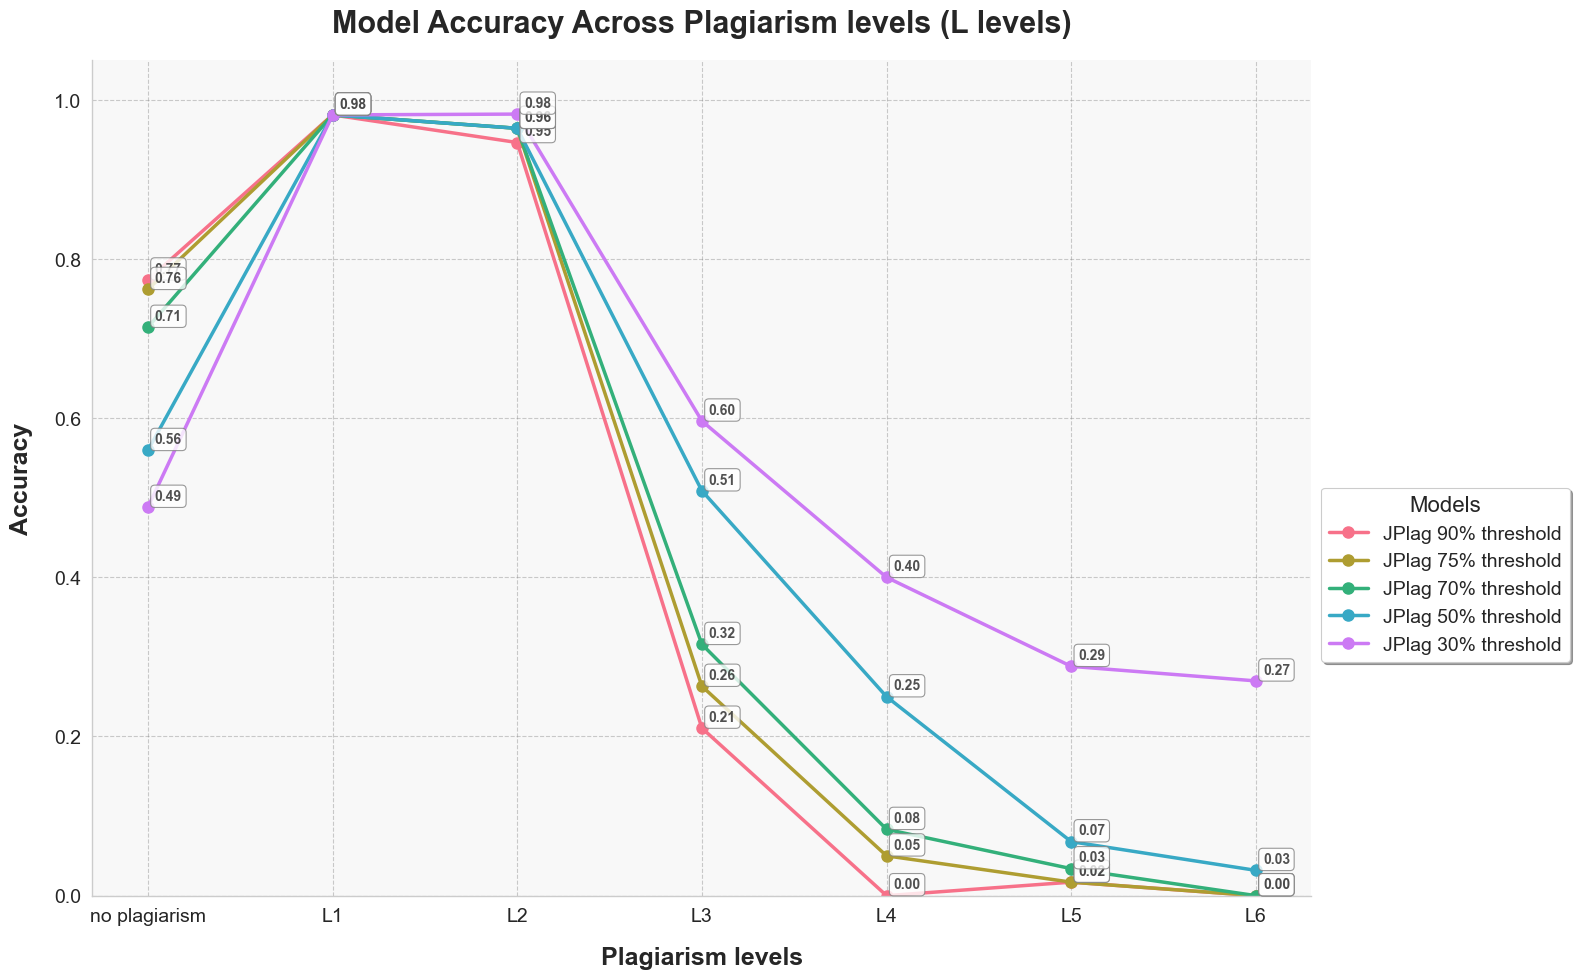

In [4]:
def plot_accuracy_per_level(df: pd.DataFrame, name: str) -> None:
    data = df.copy()
    # data = data[data['model'].str.contains('jplag')]
    # Set the style for modern, academic plots
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.4)

    # Use a modern color palette
    colors = sns.color_palette("husl", n_colors=len(data))

    # Create a list of L-level columns
    l_levels = ["no plagiarism"] + [f"L{i}_accuracy" for i in range(1, 7)]
    x_ticks = ["no plagiarism"] + [f"L{i}" for i in range(1, 7)]

    # Set up the plot with a larger figure size
    plt.figure(figsize=(16, 10))

    # Plot a line for each model with increased line width
    for i, (_, row) in enumerate(data.iterrows()):
        model_name = row["model"]
        plt.plot(
            range(7),
            row[l_levels],
            marker="o",
            label=model_name,
            color=colors[i],
            linewidth=2.5,
            markersize=8,
        )

    # Customize the plot
    plt.title(
        "Model Accuracy Across Plagiarism levels (L levels)",
        fontsize=22,
        fontweight="bold",
        pad=20,
    )
    plt.xlabel("Plagiarism levels", fontsize=18, fontweight="bold", labelpad=15)
    plt.ylabel("Accuracy", fontsize=18, fontweight="bold", labelpad=15)
    plt.xticks(range(7), x_ticks, fontsize=14)
    plt.yticks(fontsize=14)

    # Set y-axis to start from 0 and end at 1
    plt.ylim(0, 1.05)  # Slightly over 1 to avoid cutting off top markers

    # Add subtle grid lines
    plt.grid(True, linestyle="--", alpha=0.4, color="gray")

    # Improve legend
    plt.legend(
        title="Models",
        title_fontsize="16",
        fontsize="14",
        loc="best",
        bbox_to_anchor=(1, 0.5),
        frameon=True,
        fancybox=True,
        shadow=True,
    )

    # Add value labels on the points more clearly
    for i, (_, row) in enumerate(data.iterrows()):
        for j, level in enumerate(l_levels):
            plt.annotate(
                f"{row[level]:.2f}",
                (j, row[level]),
                xytext=(5, 5),
                textcoords="offset points",
                fontsize=10,
                fontweight="bold",
                alpha=0.8,
                bbox={
                    "boxstyle": "round,pad=0.3",
                    "fc": "white",
                    "ec": "gray",
                    "alpha": 0.8,
                },
            )

    # Add a light background color
    plt.gca().set_facecolor("#f8f8f8")

    # Remove top and right spines for a cleaner look
    sns.despine()

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.savefig(f"plots/{name}.png")
    plt.show()
    # save plot
plot_accuracy_per_level(best_df, "selected_llms_accuracy_per_level")
plot_accuracy_per_level(all_df, "llms_accuracy_per_level")
plot_accuracy_per_level(jplag_df, "jplag_accuracy_per_level")

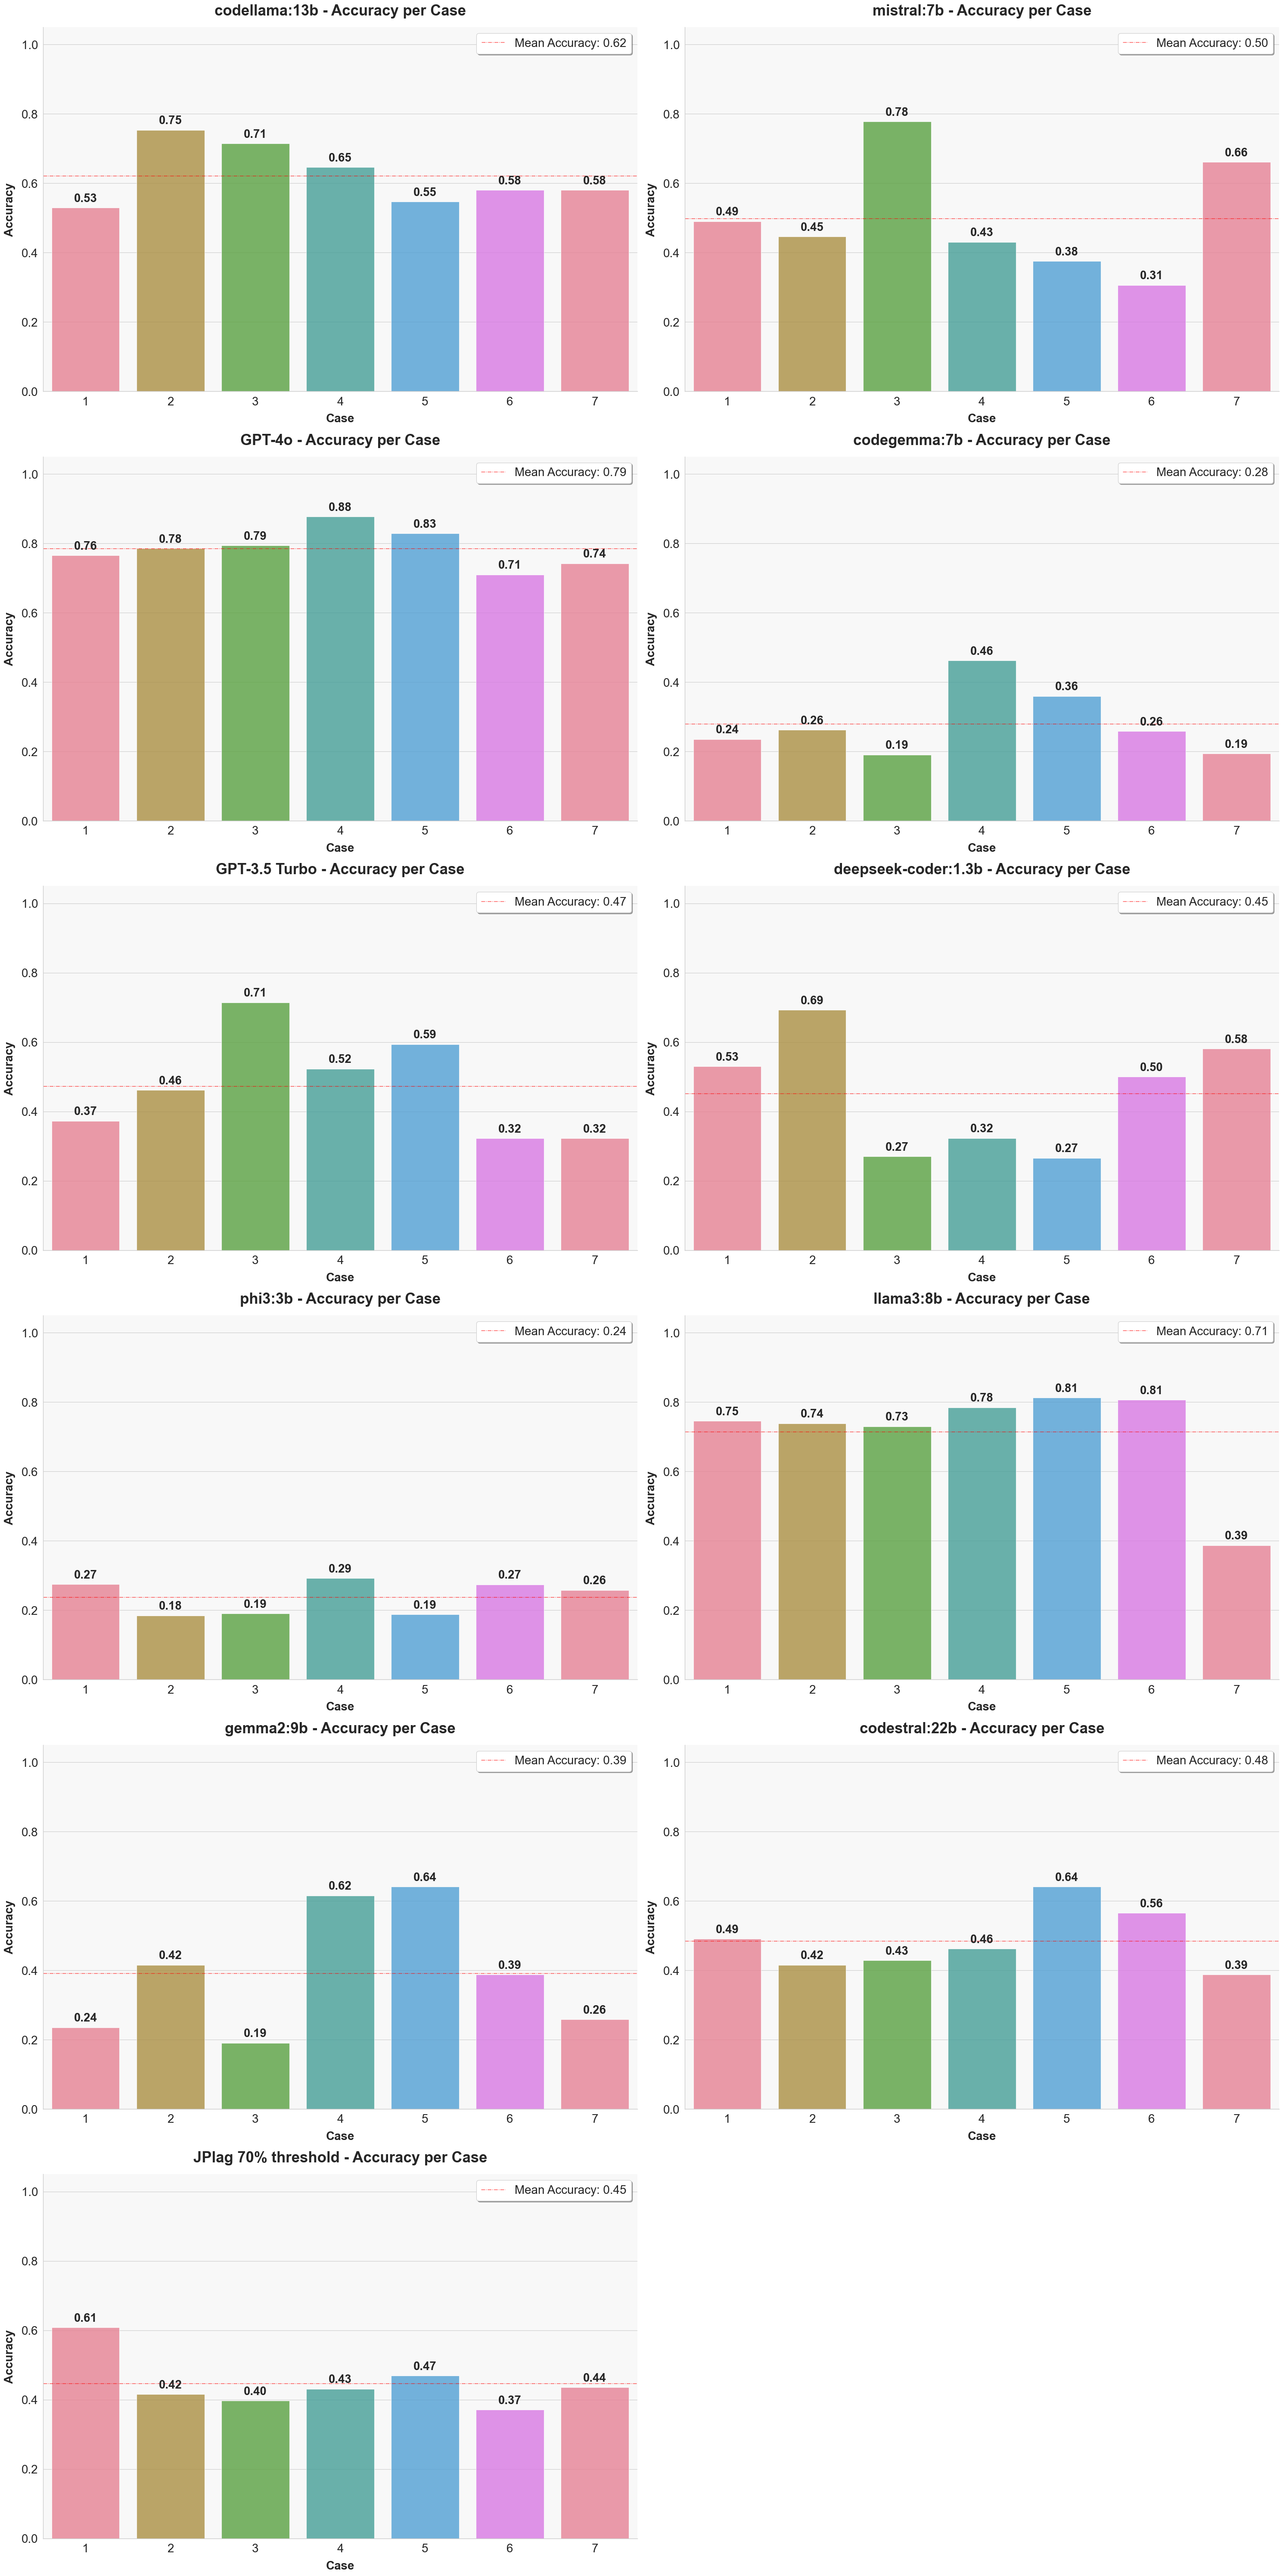

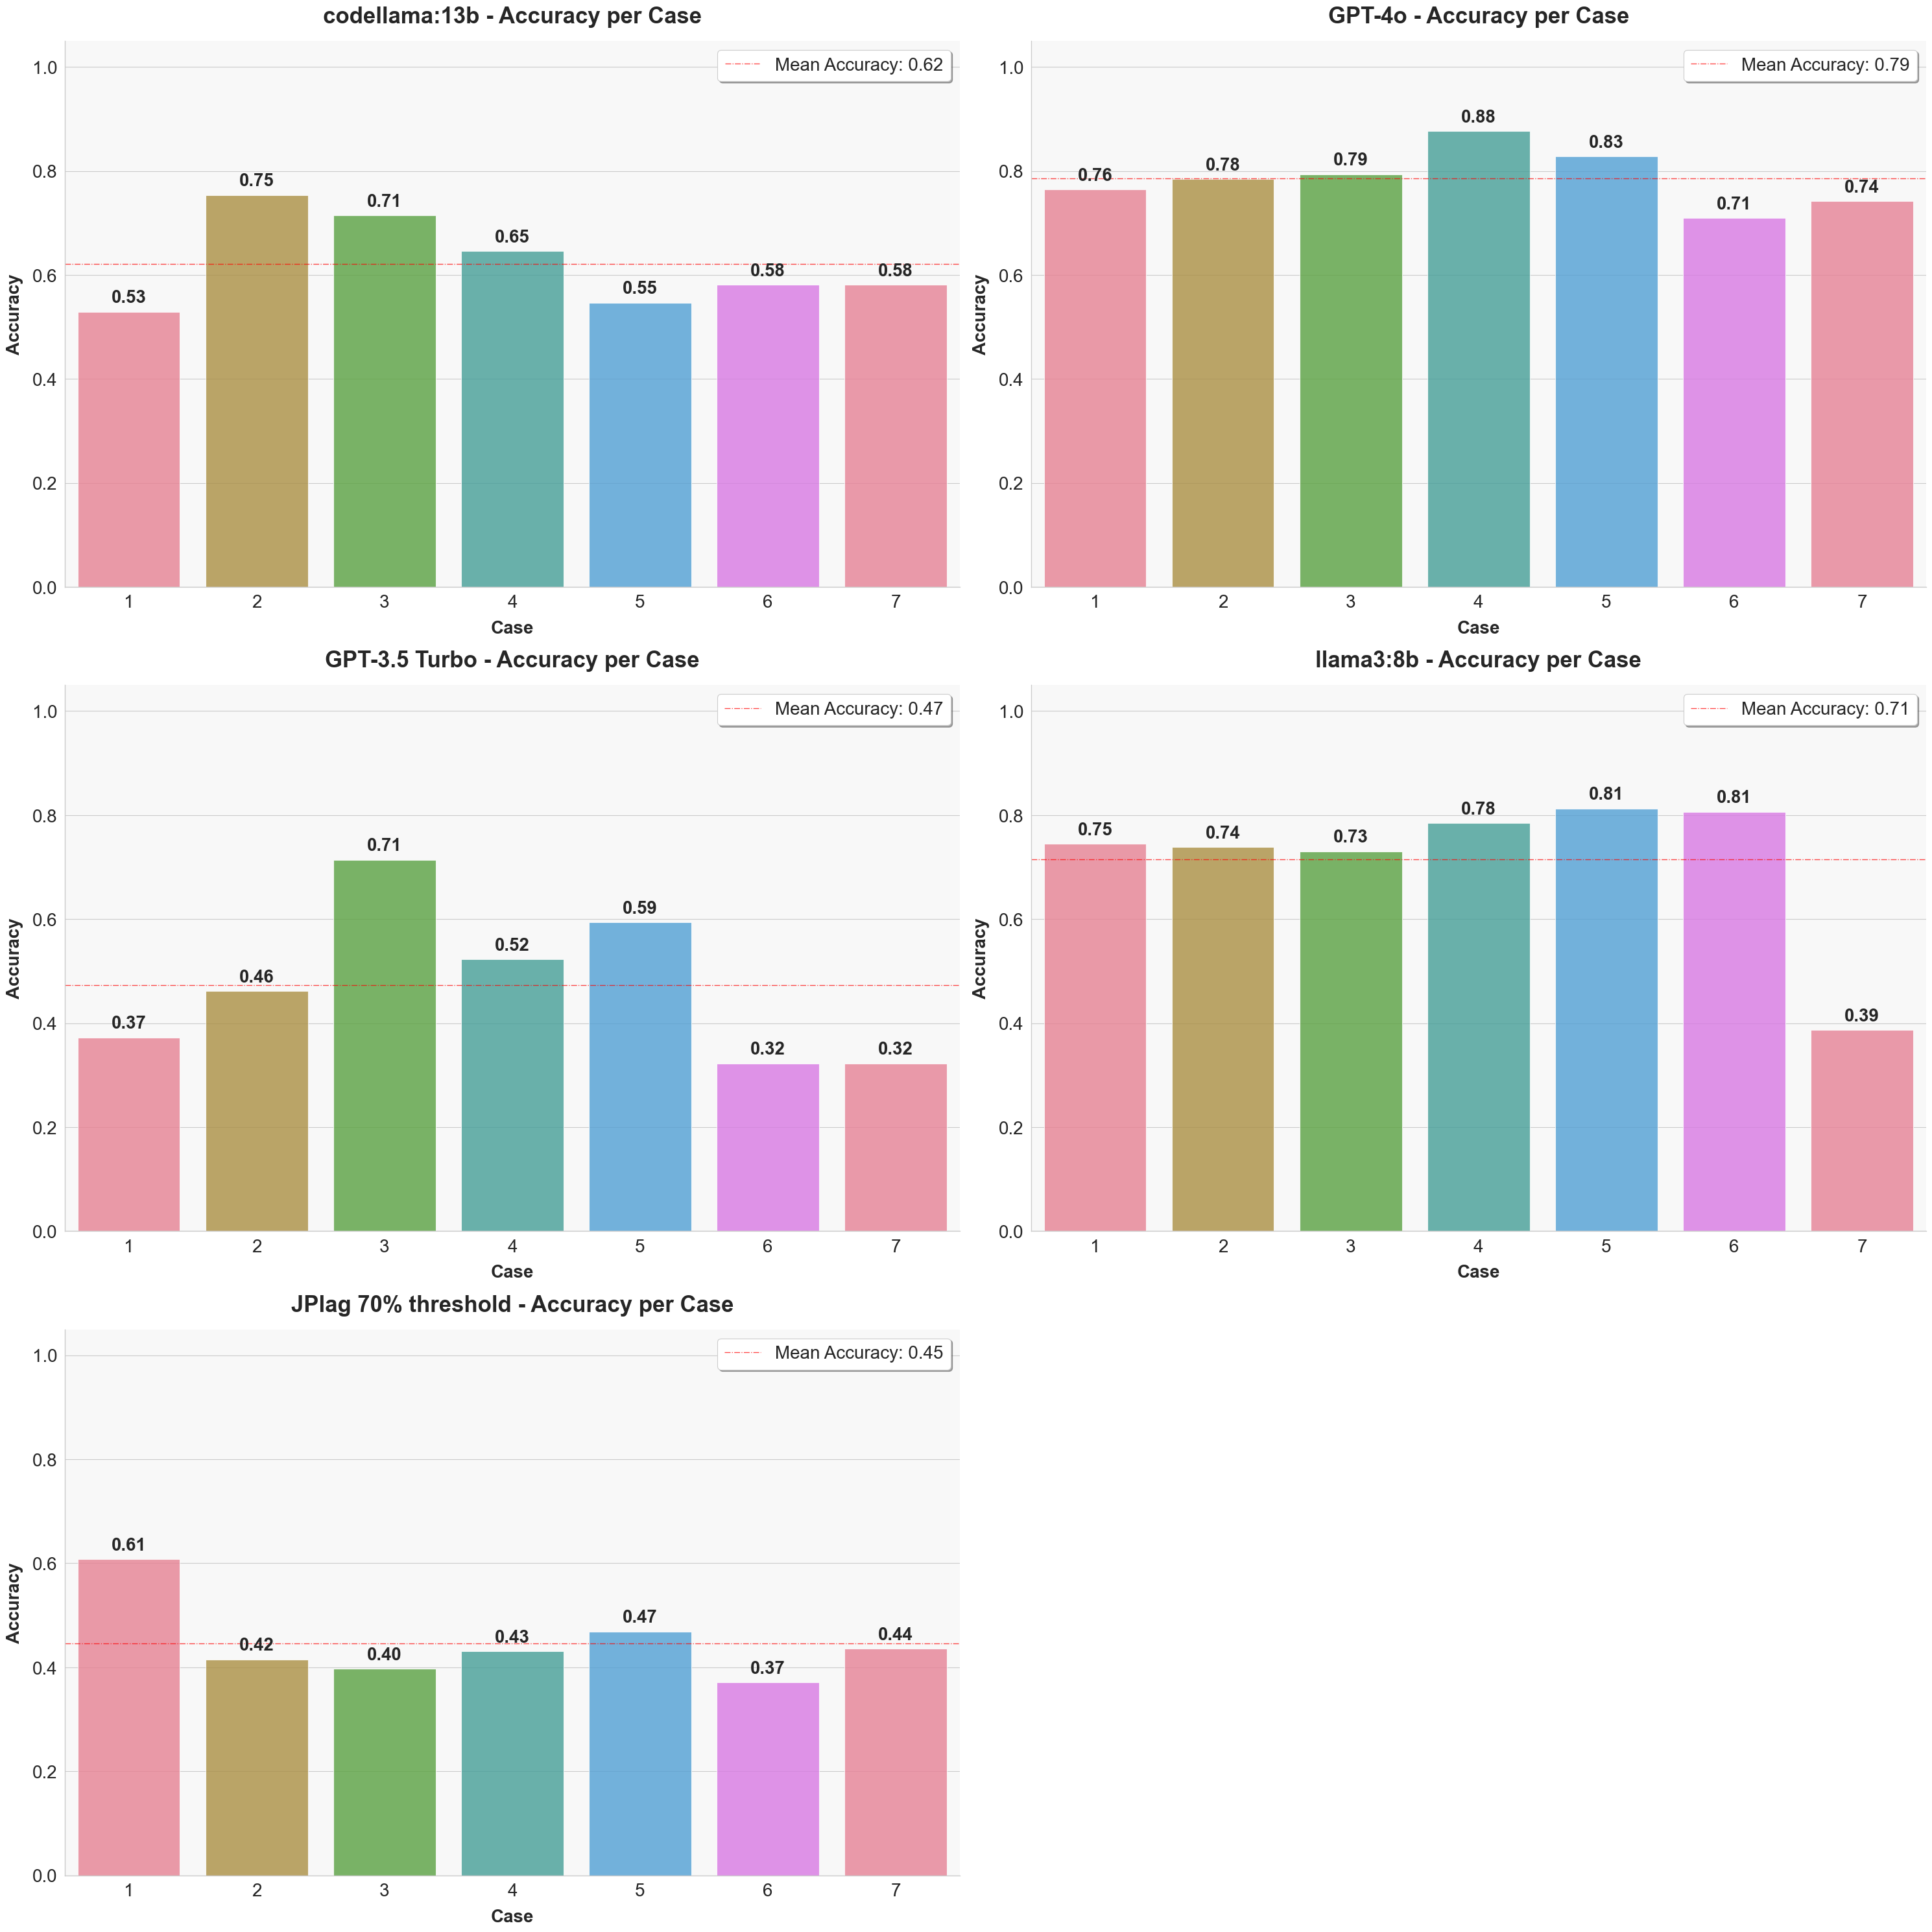

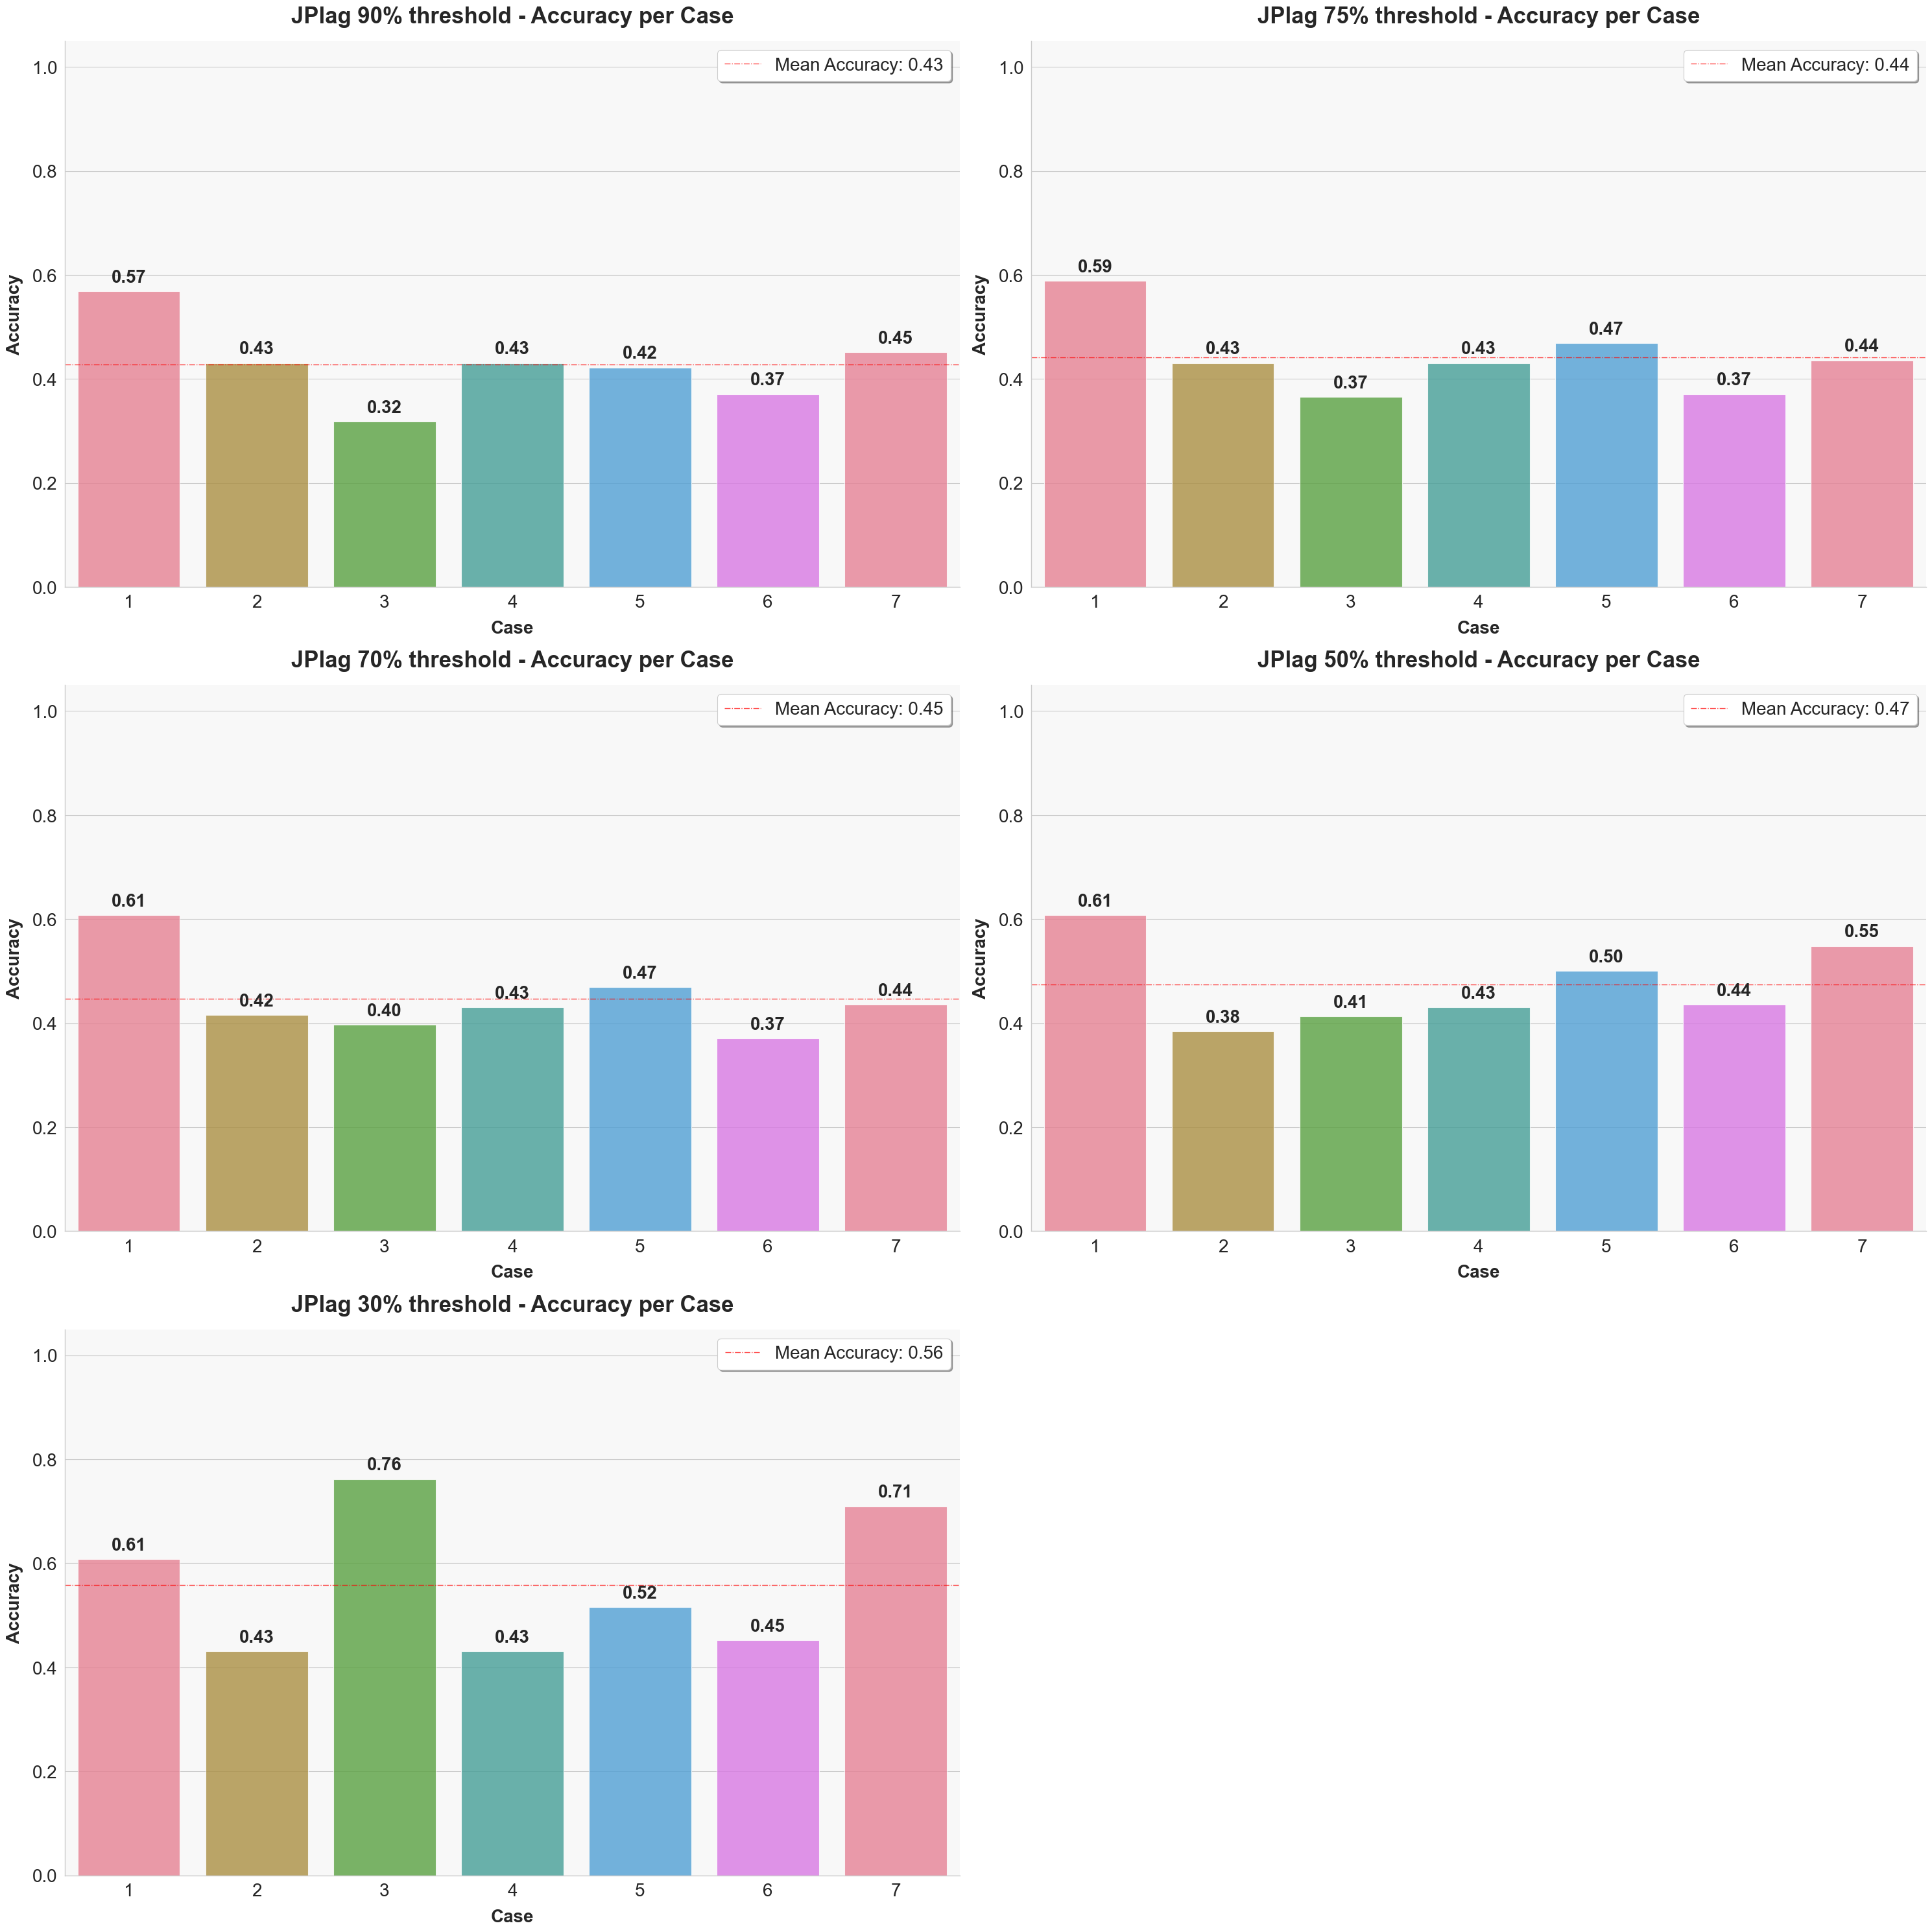

In [5]:
def plot_accuracy_per_case(df: pd.DataFrame, name: str) -> None:
    n_models = len(df)
    n_cols = min(2, n_models)  # Max 2 columns
    n_rows = math.ceil(n_models / n_cols)

    # Set up the main figure
    fig = plt.figure(figsize=(15 * n_cols, 10 * n_rows))

    # Set the style for modern, academic plots
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.4)

    for idx, model in enumerate(df['model_name'], 1):
        # Read and process data
        model_results = pd.read_csv(f"data/results/{model}")
        model_results = model_results[["L", "case", "plagiarized", "pred_predicted"]]
        model_name = df[df["model_name"] == model]["model"].values[0]
        data = model_results.copy()
        data["correct"] = data["plagiarized"] == data["pred_predicted"]
        accuracy_per_case = data.groupby("case")["correct"].mean().reset_index()

        # Create subplot
        ax = fig.add_subplot(n_rows, n_cols, idx)

        # Create the bar plot
        sns.barplot(
            x="case",
            y="correct",
            hue="case",
            data=accuracy_per_case,
            palette="husl",
            alpha=0.8,
            legend=False,
            ax=ax,
        )

        # Customize the plot
        ax.set_title(
            f"{model_name} - Accuracy per Case", fontsize=25, fontweight="bold", pad=20
        )
        ax.set_xlabel("Case", fontsize=20, fontweight="bold", labelpad=10)
        ax.set_ylabel("Accuracy", fontsize=20, fontweight="bold", labelpad=10)
        ax.tick_params(axis="both", which="major", labelsize=20)

        # Set y-axis to start from 0 and end at 1
        ax.set_ylim(0, 1.05)

        # Add value labels on top of the bars
        for i, v in enumerate(accuracy_per_case["correct"]):
            ax.text(
                i,
                v + 0.01,
                f"{v:.2f}",
                ha="center",
                va="bottom",
                fontsize=20,
                fontweight="bold",
            )

        # Add a light background color
        ax.set_facecolor("#f8f8f8")

        # Remove top and right spines for a cleaner look
        sns.despine()

        # Add a horizontal line for the mean accuracy
        mean_accuracy = accuracy_per_case["correct"].mean()
        ax.axhline(y=mean_accuracy, color="r", linestyle="-.", linewidth=1, alpha=0.7)

        # Create a custom legend
        legend_elements = [
            Line2D(
                [0],
                [0],
                color="r",
                lw=1,
                linestyle="-.",
                alpha=0.7,
                label=f"Mean Accuracy: {mean_accuracy:.2f}",
            )
        ]
        ax.legend(
            handles=legend_elements,
            loc="upper right",
            fontsize=20,
            frameon=True,
            fancybox=True,
            shadow=True,
        )

    # Adjust layout and display the plot
    plt.tight_layout()
    # save plot
    plt.savefig(f"plots/{name}.png")
    plt.show()
plot_accuracy_per_case(all_df, "llms_accuracy_per_case")
plot_accuracy_per_case(best_df, "selected_llms_accuracy_per_case")
plot_accuracy_per_case(jplag_df, "jplag_accuracy_per_case")